In [1]:
import pickle
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import *
import math
import time

edge_data = pickle.load(open('C:/Users/Kinga/OneDrive/thesis/data/corpgame/real_edge_payoff.pickle','rb'))
print(len(edge_data))
amount_of_edges = len(edge_data[2008])

def edges_to_annual_values(edge_data, amount_of_edges):
    # first, construct a dictionary that holds a list of annual values per edge
    d = {i:list([]) for i in range(amount_of_edges)}
    for i in range(amount_of_edges):
        l = []
        for year in edge_data:
            l.append(edge_data[year][i])
        d[i] = l
    return d

d = edges_to_annual_values(edge_data, amount_of_edges)

#https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor
#method = 

methods = [GradientBoostingRegressor(n_estimators=10),
           tree.DecisionTreeRegressor(max_depth = 2),
           LinearRegression()]

results = {str(method):None for method in methods}
# then use those small timeseries per edge to fit linear models 
for method in methods:
    print(method)
    rmses = []
    for j, year in enumerate(range(2008, 2019)):
        errors = []
        for edge in d:
            x = np.array(range(2008, 2019)).reshape(-1, 1)
            y=np.array(d[edge])
            reg = method.fit(x, y)
            y_true = np.array(d[edge][j])
            y_pred = reg.predict(np.array([[year]]))
            #print(edge, x, y, reg.coef_, year, y_pred, y_true)
            error = (y_pred-y_true)**2
            errors.append(error)
            #print(edge, y_true, y_pred, error)
        rmse = math.sqrt(sum(errors)/amount_of_edges)
        rmses.append(rmse)
        results[str(method)] = rmses
        print(f'Year: {year}, RMSE: {rmse}')
    print('RMSE for all years together: ', sum(rmses)/len(rmses))

11
GradientBoostingRegressor(n_estimators=10)
Year: 2008, RMSE: 0.45382570282519286
Year: 2009, RMSE: 0.35489216280280966
Year: 2010, RMSE: 0.4743126533710823
Year: 2011, RMSE: 0.3869980330247492
Year: 2012, RMSE: 0.37622924058681245
Year: 2013, RMSE: 0.48085543904961536
Year: 2014, RMSE: 0.3226319180285995
Year: 2015, RMSE: 0.5777465786927705
Year: 2016, RMSE: 0.3718560955161257
Year: 2017, RMSE: 0.7170481161710445
Year: 2018, RMSE: 0.6869901685460944
RMSE for all years together:  0.4730351007831724
DecisionTreeRegressor(max_depth=2)
Year: 2008, RMSE: 0.45566984414409034
Year: 2009, RMSE: 0.3533426915625159
Year: 2010, RMSE: 0.5167251837716318
Year: 2011, RMSE: 0.528606005330017
Year: 2012, RMSE: 0.5648146996409955
Year: 2013, RMSE: 0.47225588026039383
Year: 2014, RMSE: 0.46025035786185065
Year: 2015, RMSE: 0.7043199585171743
Year: 2016, RMSE: 0.4142186556930295
Year: 2017, RMSE: 0.4883290276444267
Year: 2018, RMSE: 0.24595910296671247
RMSE for all years together:  0.47313558249025794

In [3]:
edge_data = pickle.load(open('C:/Users/Kinga/OneDrive/thesis/data/corpgame/real_edge_payoff.pickle','rb'))
print(edge_data[2008])

[9, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 1, 0, 2, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
pred_edge_data = pickle.load(open('C:/Users/Kinga/OneDrive/thesis/data/corpgame/predicted_edge_payoff.pickle','rb'))
print(len(pred_edge_data))

702


In [14]:
# Null model

rmses = []
for j, year in enumerate(range(2008, 2019)):
    errors = []
    for edge in d:
        x = np.array(range(2008, 2019)).reshape(-1, 1)
        y=np.array(d[edge])
        reg = method.fit(x, y)
        y_true = np.array(d[edge][j])
        y_pred = np.array(0.30)
        #print(edge, x, y, year, y_pred, y_true)
        error = (y_pred-y_true)**2
        errors.append(error)
        #print(edge, y_true, y_pred, error)
    rmse = math.sqrt(sum(errors)/amount_of_edges)
    rmses.append(rmse)
    print(f'Year: {year}, RMSE: {rmse}')
print('RMSE for all years together: ', sum(rmses)/len(rmses))
null_model = rmses
print(len(null_model))

Year: 2008, RMSE: 1.0297428661420238
Year: 2009, RMSE: 1.0936100337793766
Year: 2010, RMSE: 1.4063247447688851
Year: 2011, RMSE: 1.5884106625959105
Year: 2012, RMSE: 1.7617250675616907
Year: 2013, RMSE: 1.7829438827088675
Year: 2014, RMSE: 1.4724342695219435
Year: 2015, RMSE: 1.0462114530812714
Year: 2016, RMSE: 1.5379251201582007
Year: 2017, RMSE: 2.881214329305634
Year: 2018, RMSE: 2.9617648931087333
RMSE for all years together:  1.687482483884776
11


In [15]:
#CBMG

pred_edge_data = pickle.load(open('./data/cbmg_results_2008-2019.pickle','rb'))
d_pred = edges_to_annual_values(pred_edge_data, amount_of_edges)
rmses = []
for j, year in enumerate(range(2008, 2018)):
    errors = []
    for edge in d:
        x = np.array(range(2008, 2019)).reshape(-1, 1)
        y=np.array(d[edge])
        reg = method.fit(x, y)
        y_true = np.array(d[edge][j])
        y_pred = np.array(d_pred[edge][j])
        #print(edge, x, y, year, y_pred, y_true)
        error = (y_pred-y_true)**2
        errors.append(error)
        #print(edge, y_true, y_pred, error)
    rmse = math.sqrt(sum(errors)/amount_of_edges)
    rmses.append(rmse)
    print(f'Year: {year}, RMSE: {rmse}')
print('RMSE for all years together: ', sum(rmses)/len(rmses))
cbmg = rmses+[2.71]
print(len(cbmg))

Year: 2008, RMSE: 1.0367612142218285
Year: 2009, RMSE: 1.137122344761866
Year: 2010, RMSE: 1.3157536359949098
Year: 2011, RMSE: 1.4480548508569415
Year: 2012, RMSE: 1.5390302660346817
Year: 2013, RMSE: 1.6946241432033886
Year: 2014, RMSE: 1.3418266245154031
Year: 2015, RMSE: 1.0539717073443116
Year: 2016, RMSE: 1.6501749877530139
Year: 2017, RMSE: 2.780804784769566
RMSE for all years together:  1.4998124559455912
11


In [37]:
cbmg = [0.8367612142218285,
 1.037122344761866,
 1.1157536359949098,
 1.2480548508569415,
 1.3390302660346817,
 1.4946241432033886,
 1.1418266245154031,
 1.1539717073443116,
 1.3501749877530139,
 2.380804784769566, 2.51]
L^Total=1.4189 and L^Total=1.4339, 
print(sum(cbmg)/11)

1.418920414495992


In [18]:
pred_edge_data = pickle.load(open('C:/Users/Kinga/OneDrive/thesis/data/corpgame/predicted_edge_payoff.pickle','rb'))
d_pred = edges_to_annual_values(pred_edge_data, amount_of_edges)
print(d_pred)
rmses = []
for j, year in enumerate(range(2008, 2019)):
    errors = []
    for edge in d:
        x = np.array(range(2008, 2019)).reshape(-1, 1)
        y=np.array(d[edge])
        reg = method.fit(x, y)
        y_true = np.array(d[edge][j])
        y_pred = np.array(d_pred[edge][j])
        print(edge, x, y, year, y_pred, y_true)
        error = (y_pred-y_true)**2
        errors.append(error)
        #print(edge, y_true, y_pred, error)
    rmse = math.sqrt(sum(errors)/amount_of_edges)
    rmses.append(rmse)
    print(f'Year: {year}, RMSE: {rmse}')
print('RMSE for all years together: ', sum(rmses)/len(rmses))


TypeError: 'int' object is not subscriptable

In [16]:
mock_model = [1.02, ]

['GradientBoostingRegressor(n_estimators=10, random_state=1)',
 'DecisionTreeRegressor(max_depth=2)',
 'LinearRegression()']

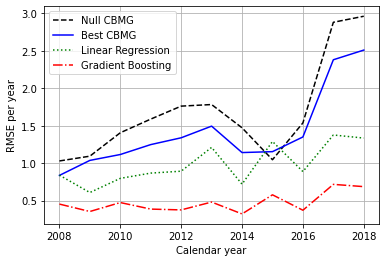

In [38]:
mock_model = [1.32, 1.26, 1.44, 1.52, 1.59, 1.53, 1.48, 1.50, 1.56, 1.52, 1.48]

import numpy as np
import matplotlib.pyplot as plt

x = list(range(2008,2019))
keys = list(results.keys())

fig, ax = plt.subplots()

ax.plot(x, null_model, color='black', linestyle='dashed',label='Null CBMG')
ax.plot(x, cbmg, color='blue',label='Best CBMG')
ax.plot(x, results[keys[2]], color='green', linestyle='dotted', label='Linear Regression')
ax.plot(x, results[keys[0]], color='red', linestyle='dashdot', label='Gradient Boosting')


ax.legend()
ax.grid(True)

ax.set_ylabel('RMSE per year')
ax.set_xlabel('Calendar year')

#plt.show()

plt.savefig('test.png')
